In [3]:
d <- read.table("aneurysm.csv", header=T, sep=";", stringsAsFactors=T) #on charge les données

In [4]:
d <- na.omit(d) #on enlève les valeurs NA

In [5]:
head(d) #on regarde les variables d'analyse des données et leur type

,country,gender,aneurysm,bmi,risk
,<fct>,<fct>,<int>,<dbl>,<int>
1,Vietnam,M,21,21.094,0
2,Vietnam,M,27,19.031,0
3,Vietnam,M,28,20.313,0
4,Vietnam,F,33,17.778,0
5,France,F,34,21.604,0
6,Vietnam,F,35,21.096,0


In [6]:
dim(d) #on regarde la dimension de notre échantillon de données, ici de 209 individus et de 5 paramètres (country, gender, aneurysm, bmi et risk)

[1] 209   5

In [7]:
summary(d) #on regarde les stats associées aux variables pour voir si nos données sont par exemple, d'un effectif suffisant 

    country    gender     aneurysm           bmi             risk      
 France : 99   F: 51   Min.   : 21.00   Min.   :13.33   Min.   :0.000  
 Vietnam:110   M:158   1st Qu.: 37.00   1st Qu.:19.23   1st Qu.:1.000  
                       Median : 46.00   Median :22.21   Median :1.000  
                       Mean   : 47.57   Mean   :22.76   Mean   :1.388  
                       3rd Qu.: 55.00   3rd Qu.:26.37   3rd Qu.:2.000  
                       Max.   :102.00   Max.   :36.16   Max.   :5.000  

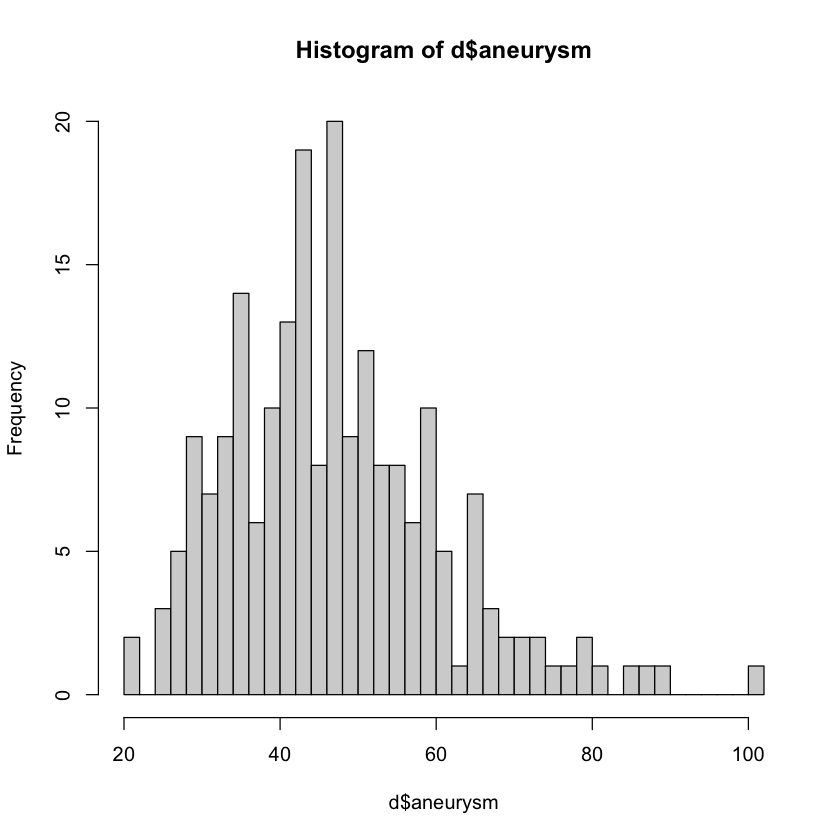

In [8]:
hist(d$aneurysm, nclass=50) #nous regardons l'histo de l'âge de première prise en charge

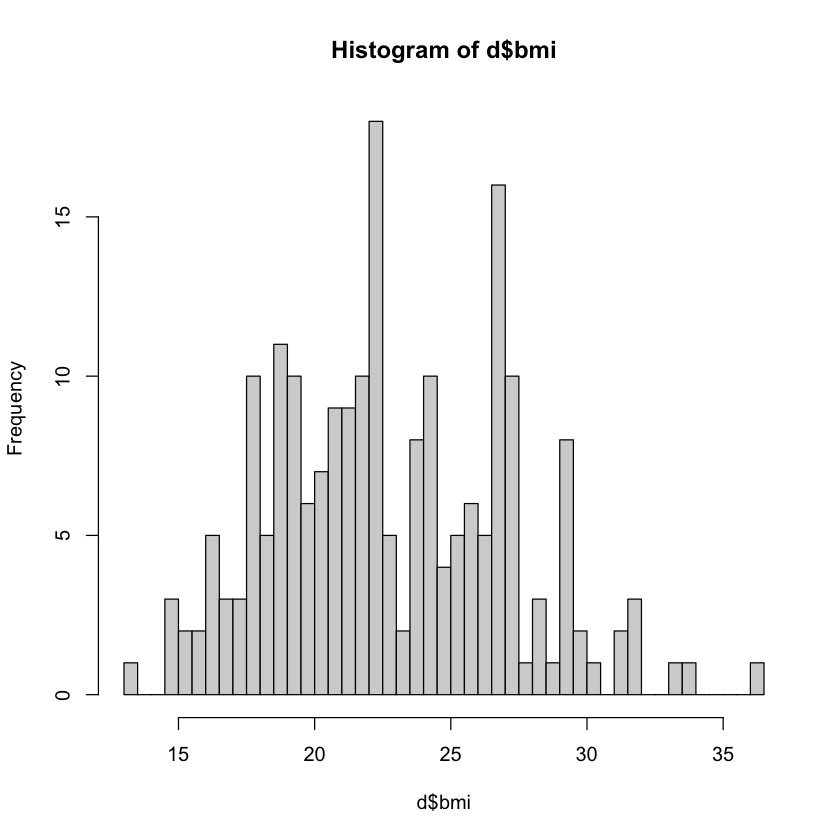

In [9]:
hist(d$bmi, nclass=50) #histo de l'IMC 

In [11]:
install.packages("mclust", dependencies=T) #installation du package Mclust pour effectuer une classification 

In [12]:
library("mclust") #visualiser si la libraire MClust a bien été installée 

Warning message:
"le package 'mclust' a 'et'e compil'e avec la version R 4.3.3"
Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



In [13]:
d.mc.b<- Mclust(d$bmi, G=3:7) #mélange gaussien selon la variable IMC pour trouver des proba d'appartenance à un groupe

In [14]:
d.mc.b$G #visualisation du nombre de groupes trouvés à partir de l'IMC

[1] 3

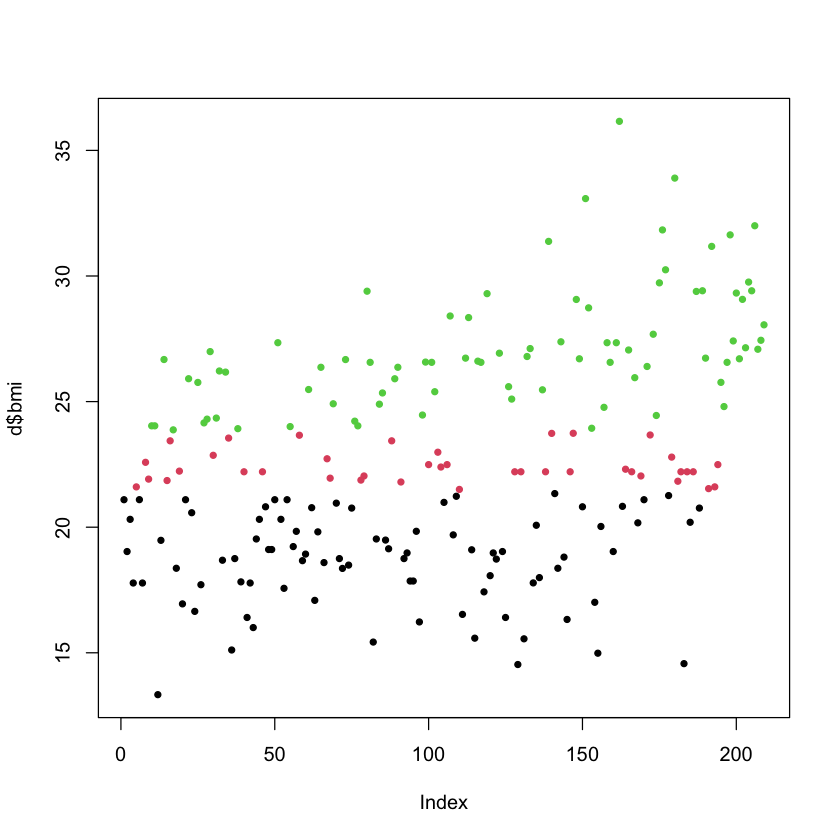

In [15]:
plot(x=d$bmi, pch = 20, col = d.mc.b$classification) #tracé du graphique des points de couleurs différentes selon les classifications selon BMI

In [16]:
d.mc.a<- Mclust(d$aneurysm, G=1:7) #mélange gaussien selon la variable âge pour trouver des proba d'appartenance à un groupe

In [17]:
d.mc.a$G #visualisation du nombre de groupes trouvés à partir de l'âge

[1] 2

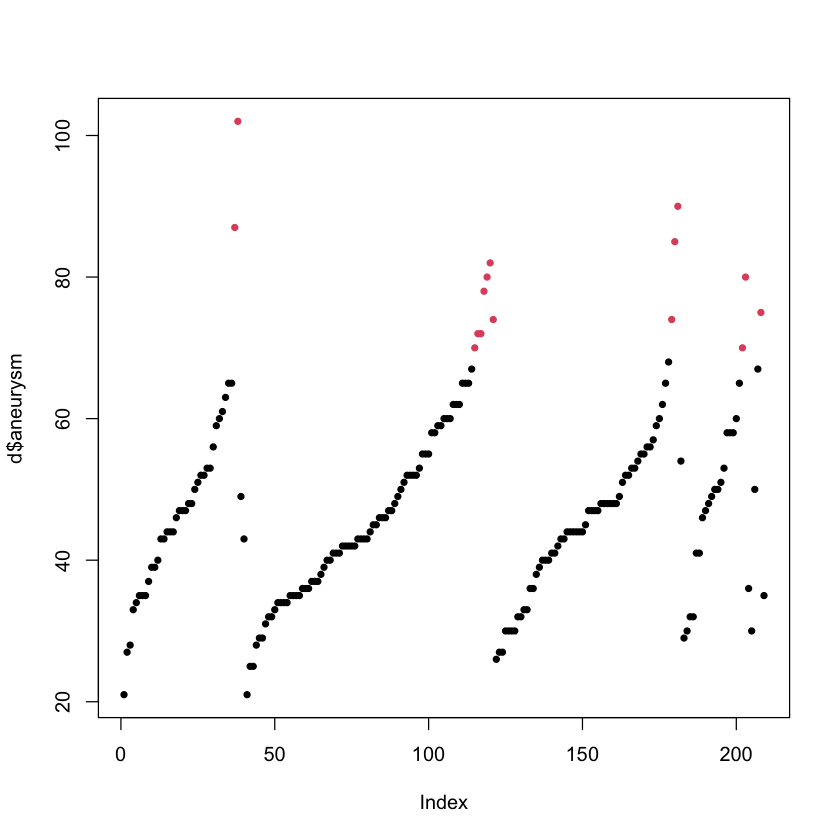

In [18]:
plot(x=d$aneurysm, pch = 20, col = d.mc.a$classification) #tracé du graphique des points de couleurs différentes selon les classifications selon l'âge

In [19]:
d.mc.r<- Mclust(d$risk, G=1:7) #on effectue une classification mclust sur le risque de récidive

In [20]:
d.mc.r$G #on regarde combien de groupes ont été trouvés par la classification mclust selon le risque de récidive

[1] 4

In [21]:
shapiro.test(d$bmi) #nous regardons si l'échantillon est normal, ce qui est le cas ici car p<0,05 pour l'IMC


	Shapiro-Wilk normality test

data:  d$bmi
W = 0.98575, p-value = 0.03383


In [22]:
shapiro.test(d$aneurysm) #nous regardons si l'échantillon est normal, ce qui est le cas ici car p<0,05 pour l'âge


	Shapiro-Wilk normality test

data:  d$aneurysm
W = 0.96122, p-value = 1.764e-05


In [23]:
shapiro.test(d$risk) #nous regardons si l'échantillon est normal, ce qui est le cas ici car p<0,05 pour le risque de récidive


	Shapiro-Wilk normality test

data:  d$risk
W = 0.89013, p-value = 3.124e-11


In [24]:
#nous calculons ici les écarts types pour chaque variable quantitative pour vérifier l'homoscédasticité pour appliquer l'ANOVA de type 2
sigma_risk = sd(d$risk)
sigma_bmi = sd(d$bmi)
sigma_age = sd(d$aneurysm)

In [25]:
#nous calculons les min et les max de chaque écart-type pour les variables quantitatives
max_sigma_risk <- max(sigma_risk)
min_sigma_risk <- min(sigma_risk)

max_sigma_bmi<- max(sigma_bmi)
min_sigma_bmi <- min(sigma_bmi)

max_sigma_age <- max(sigma_age)
min_sigma_age <- min(sigma_age)

In [26]:
#vérification de l'homoscédasticité selon la règle : sigma_max / sigma_min <3 - Ce qui respecte ici bel et bien la règle
max_sigma_risk/min_sigma_risk

max_sigma_bmi/min_sigma_bmi

max_sigma_age/min_sigma_age

[1] 1

[1] 1

[1] 1

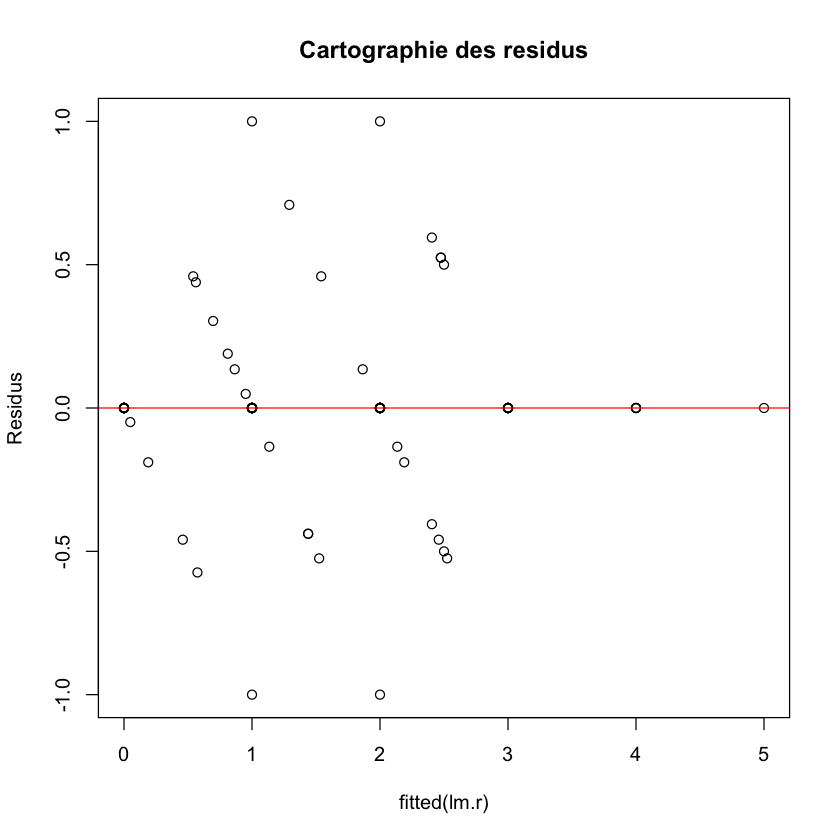

In [27]:
lm.r=with(d, lm(d$risk ~ as.factor(d$country) + as.factor(d$gender) +as.factor(d$aneurysm) + as.factor(d$bmi))) #ANOVA de type 1 sur le risque
plot(fitted(lm.r), residuals(lm.r),  main = "Cartographie des residus", ylab = "Residus")
abline(h = 0, col = "red") #ligne horizontale

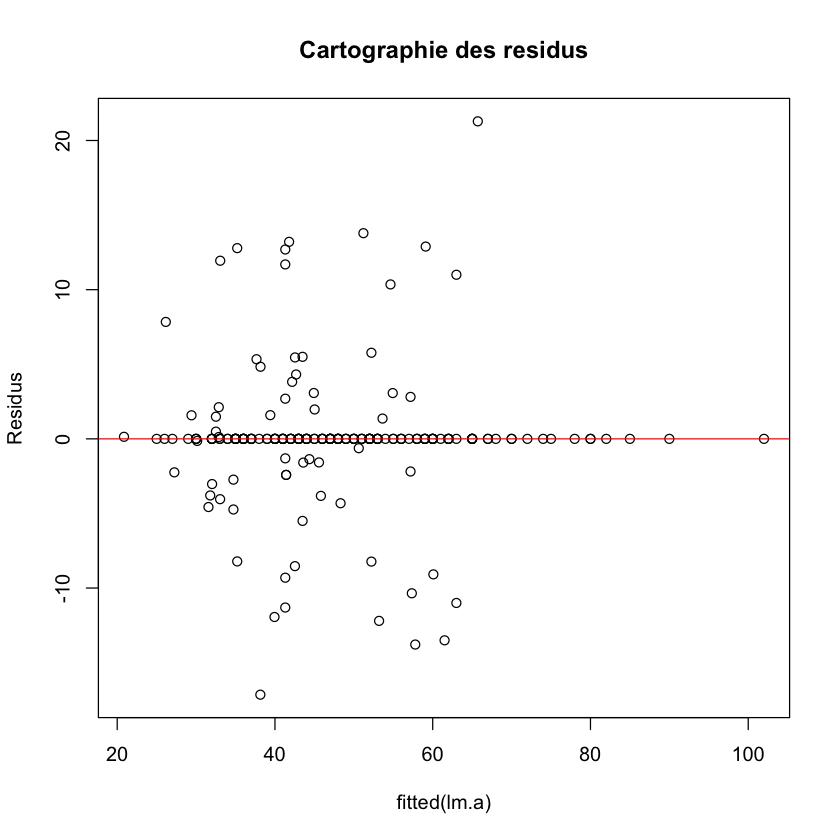

In [28]:
lm.a=with(d, lm(d$aneurysm ~ as.factor(d$country) + as.factor(d$gender) +as.factor(d$risk) + as.factor(d$bmi))) #ANOVA de type 1 sur l'âge
plot(fitted(lm.a), residuals(lm.a),  main = "Cartographie des residus", ylab = "Residus")
abline(h = 0, col = "red") #ligne horizontale

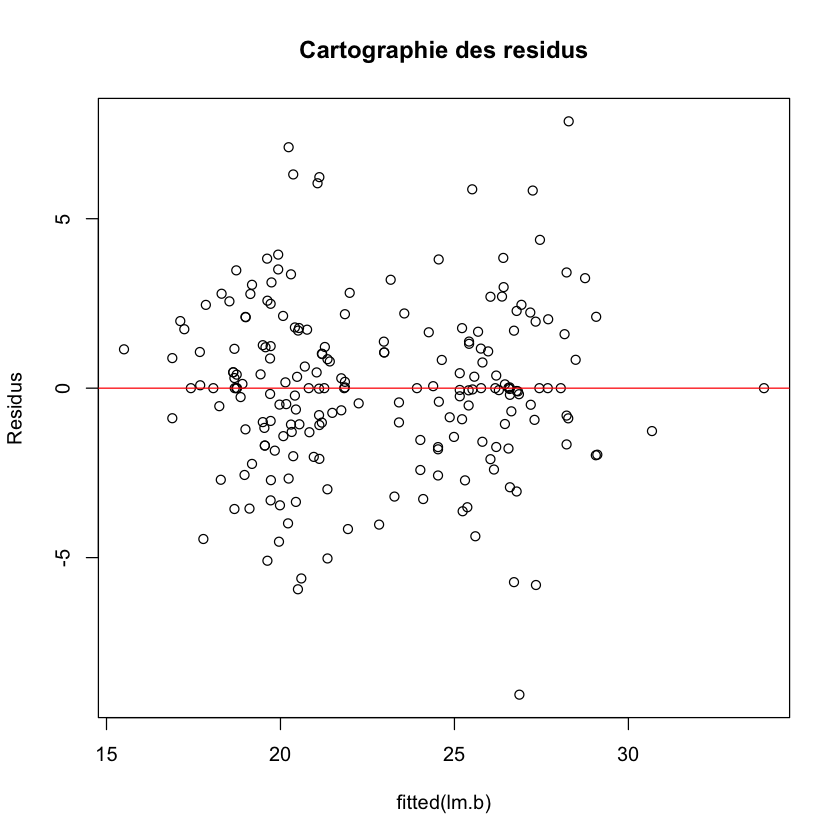

In [29]:
lm.b=with(d, lm(d$bmi ~ as.factor(d$country) + as.factor(d$gender) +as.factor(d$risk) + as.factor(d$aneurysm))) #ANOVA de type 1 sur l'IMC
plot(fitted(lm.b), residuals(lm.b),  main = "Cartographie des residus", ylab = "Residus")
abline(h = 0, col = "red") #ligne horizontale

In [30]:
kruskal.test(risk ~ bmi, data=d)
kruskal.test(risk ~ aneurysm, data=d)


	Kruskal-Wallis rank sum test

data:  risk by bmi
Kruskal-Wallis chi-squared = 174.36, df = 164, p-value = 0.2753



	Kruskal-Wallis rank sum test

data:  risk by aneurysm
Kruskal-Wallis chi-squared = 53.883, df = 53, p-value = 0.4404


In [32]:
anova(lm(d$risk~d$country*d$gender*d$aneurysm*d$bmi,data=d))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
d$country,1,1.164402e+01,1.164402e+01,14.285070463,2.093011e-04
d$gender,1,1.486687e+01,1.486687e+01,18.238911580,3.055356e-05
d$aneurysm,1,3.868550e-01,3.868550e-01,0.474599916,4.917059e-01
d$bmi,1,1.036394e+01,1.036394e+01,12.714647112,4.574277e-04
d$country:d$gender,1,3.457977e-01,3.457977e-01,0.424230152,5.156086e-01
d$country:d$aneurysm,1,3.255195e-01,3.255195e-01,0.399352523,5.281717e-01
d$gender:d$aneurysm,1,5.473819e-04,5.473819e-04,0.000671537,9.793527e-01
d$country:d$bmi,1,7.424889e+00,7.424889e+00,9.108973265,2.886893e-03
d$gender:d$bmi,1,2.080981e-01,2.080981e-01,0.255298158,6.139455e-01



Les packages binaires téléchargés sont dans
	/var/folders/lb/qcvqx8917_7gvcqgrtn8t4n80000gn/T//RtmpHewRqm/downloaded_packages


In [ ]:
library(car)